<a href="https://colab.research.google.com/github/Vishnukvsvk/ML-Foundation-Google-Developers-Youtube/blob/master/TF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Working** **with** **images** <br>

**MNIST Dataset**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


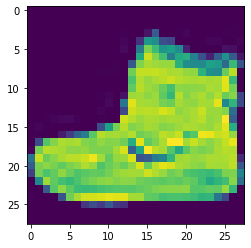

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

In [5]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
print(training_labels[0])

9


**Normalizing data**

In [0]:
training_images = training_images/255.0
test_images = test_images/255.0

In [8]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

**Model**

In [0]:
from tensorflow import keras
model = tf.keras.Sequential([
                             keras.layers.Flatten(input_shape=(28,28)),
                             keras.layers.Dense(128,activation=tf.nn.relu),
                             keras.layers.Dense(10,activation=tf.nn.softmax)
])

**Complile**

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8787
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8907


**Accuracy**

In [13]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8783


[0.3441954255104065, 0.8783000111579895]

**From below, the last value of classification[0] row is close to test_label[0]**.

**That means it is closely predicited to that label**.

In [14]:
classifications = model.predict(test_images)
print(classifications[0])

[1.2267279e-06 1.0643897e-08 6.8464436e-07 2.2670510e-09 7.3709214e-07
 1.7884774e-03 6.6284952e-07 7.8799799e-03 3.7724203e-06 9.9032450e-01]


In [15]:
print(test_labels[0])

9


#**Excersise-1**

**Using 1024 neurons**

In [16]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4700
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3572
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3226
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2981
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3445
[1.3531242e-06 1.3665541e-08 1.3507228e-07 2.1162979e-08 6.2728418e-08
 8.0352701e-04 1.8223511e-06 6.0692970e-02 8.2012484e-08 9.3850005e-01]
9


By the results, we can see that all values are very less(power of -8) except that last value(which is powe of -1) in classification array

So, adding more neurons gives better results

#**Exercise - 2**
**Output neurons are 5, actual is 10**

In [17]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5


InvalidArgumentError: ignored

We will get an error.

That means output dense layer should have same amount of neurons as labels

#**Exercise - 3**
**Adding another layer**

In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4678
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3545
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3211
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2974
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3596
[4.9832220e-06 2.7403603e-06 2.1323456e-06 2.1859405e-07 4.7799344e-06
 3.2656374e-03 5.8030082e-06 6.3156329e-02 2.5855472e-06 9.3355483e-01]
9


In our case, there is no significant impact.

But for complex datasets, its useful

#**Exercise - 4**
**Trying 15 epochs**

In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.2.0
Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5020 - accuracy: 0.8235
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8630
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3393 - accuracy: 0.8756
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.8858
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8900
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8949
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.8993
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9033
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9075
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss:

In [22]:
print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8845
[0.35119926929473877, 0.8845000267028809]


By viewing above results, accuracy got incresed by increaing epochs

#**Exercise - 5**

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [26]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.87):
      print("\nReached 87% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.2.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4774 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3586 - accuracy: 0.8696
Epoch 3/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.3205 - accuracy: 0.8822
Reached 87% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3205 - accuracy: 0.8821
